### Install Libraries and Import Packages

In [1]:
%%capture
!pip install plotly


In [2]:
%%capture
!pip install git+https://github.com/huggingface/accelerate.git


In [3]:
%%capture
!pip install textblob
!python -m textblob.download_corpora


In [4]:
%%capture
!pip install fastapi



In [5]:
%%capture
pip install python-multipart


In [6]:
%%capture
pip install uvicorn

In [7]:
%%capture
pip install -U kaleido


In [8]:
%%capture
pip install ipywidgets


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Loading the Data

In [11]:
df = pd.read_csv('/content/Nov30-Jan2UU.csv')

In [12]:
# Inspect the dataset
df.head()


,UTTERANCES,TRAITS,PROMPT TYPE,TASK NAME,NODE NAME,USERID,CHANNELUID,LANGUAGE,DATE & TIME,CHANNEL,AMBIGUOUS,AMBIGUOUS INTENTS,TRAINED,MESSAGEID,USERTAGS,SESSIONTAGS,MESSAGETAGS
0,Today,NaN,message,Ask Intent,AnythingElse,u-62deb0ef-fef6-54e9-b455-c07173196951,1299f69365946088,en,01-02-2024 (2:15 PM),ivrVoice,False,NaN,False,ms-e7bb4029-ee0a-55a5-8cd7-8858b5266bdc,"{"""":""""}","{""POCTag"":""Appointment_Agent_request""||""UCID"":...",NaN
1,Correct,NaN,entity,cncl appt,ConfirmCancelCaptureYes,u-2f3e699b-1289-5e0a-8c33-a4af0fabc694,1199aafc65945fbf,en,01-02-2024 (2:12 PM),ivrVoice,False,NaN,False,ms-98903dd7-671c-5501-9125-60691db6b952,"{"""":""""}","{""Trans"":""N""||""UCID"":""1199AAFC65945FBF""||""POCT...",NaN
2,Sales,NaN,entity,Ask Intent,AskIntent,u-e7075137-f779-5133-9274-fe32c3231545,1199e41b65945ec8,en,01-02-2024 (2:08 PM),ivrVoice,False,NaN,False,ms-42e25b25-0453-5914-8b5e-4dc2e7476964,"{"""":""""}","{""UCID"":""1199E41B65945EC8""||""EndStatus"":""APPTR...",NaN
3,Q,NaN,message,cncl appt,CancelSuccess,u-63f24612-d120-57e0-b6b5-b470d7d41cd2,1299ac9d65945dd2,en,01-02-2024 (2:05 PM),ivrVoice,False,NaN,False,ms-bc27217b-3b20-5787-bca8-7f5c43bf30ed,NaN,"{""CatCode"":""""||""VDN"":""0""||""Trans"":""N""||""EndSta...",NaN
4,Speak with a person,NaN,entity,Ask Intent,AskIntent,u-2e6a84e5-d09a-5ca3-85f5-e85c974246cd,1199a1cb65945df4,en,01-02-2024 (2:04 PM),ivrVoice,False,NaN,False,ms-ed1ac1f6-fb70-5cca-8a46-d5a8b7dc18cd,"{"""":""""}","{""POCTag"":""Appointment_Agent_request""||""UCID"":...",NaN


In [13]:
df.tail()

,UTTERANCES,TRAITS,PROMPT TYPE,TASK NAME,NODE NAME,USERID,CHANNELUID,LANGUAGE,DATE & TIME,CHANNEL,AMBIGUOUS,AMBIGUOUS INTENTS,TRAINED,MESSAGEID,USERTAGS,SESSIONTAGS,MESSAGETAGS
10063,I was by,NaN,entity,Ask Intent,AskIntent,u-6b8201f7-affc-5316-9480-6d33de74f6dc,11997ae96568e0fe,en,11-30-2023 (2:23 PM),ivrVoice,False,NaN,False,ms-fbd9a0be-e789-5c44-a691-f638ad0f0dd0,"{"""":""""}","{""UCID"":""11997AE96568E0FE""||""POCTag"":""Appointm...",NaN
10064,Mike TVs working,NaN,entity,Ask Intent,AskIntent,u-12aaefc6-408f-5548-b0e7-e90ac946425c,1299e8756568e09b,en,11-30-2023 (2:22 PM),ivrVoice,False,NaN,False,ms-eb43acf3-d717-571a-b067-95106e72e8ff,"{"""":""""}","{""POCTag"":""Appointment_Agent_request""||""UCID"":...",NaN
10065,Verizon wireless me,NaN,entity,Ask Intent,AskIntent,u-fd241659-1e8d-511a-9a3d-11e44037981a,119960026568dff3,en,11-30-2023 (2:19 PM),ivrVoice,False,NaN,False,ms-e4e985f9-358d-5d38-a2d0-d87dd6ee2e06,"{"""":""""}","{""VDN"":""0""||""UCID"":""119960026568DFF3""||""CatCod...",NaN
10066,They have changed it to today,NaN,entity,Ask Intent,AskIntent,u-bb2de0bf-e173-58ad-be60-077b370a7284,1199bbb56568dfa6,en,11-30-2023 (2:18 PM),ivrVoice,False,NaN,False,ms-5fc91262-a2d0-5799-bfde-1d76094cd760,"{"""":""""}","{""UCID"":""1199BBB56568DFA6""||""POCTag"":""Appointm...",NaN
10067,Hey John,NaN,entity,Ask Intent,AskIntent,u-451b6491-5f0f-54f0-adb6-c52888da973a,1299396d6568df70,en,11-30-2023 (2:18 PM),ivrVoice,False,NaN,False,ms-c24bd3ee-5ae8-57dd-88e6-5670a485deb6,"{"""":""""}","{""UCID"":""1299396D6568DF70""||""POCTag"":""Appointm...",NaN


In [14]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10068 entries, 0 to 10067
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UTTERANCES         10068 non-null  object 
 1   TRAITS             0 non-null      float64
 2   PROMPT TYPE        10068 non-null  object 
 3   TASK NAME          10068 non-null  object 
 4   NODE NAME          10068 non-null  object 
 5   USERID             10068 non-null  object 
 6   CHANNELUID         10068 non-null  object 
 7   LANGUAGE           10068 non-null  object 
 8   DATE & TIME        10068 non-null  object 
 9   CHANNEL            10068 non-null  object 
 10  AMBIGUOUS          10068 non-null  bool   
 11  AMBIGUOUS INTENTS  0 non-null      float64
 12  TRAINED            10068 non-null  bool   
 13  MESSAGEID          10068 non-null  object 
 14  USERTAGS           9994 non-null   object 
 15  SESSIONTAGS        10068 non-null  object 
 16  MESSAGETAGS        0 n

In [15]:
# Check for missing values
print(df.isnull().sum())

UTTERANCES               0
TRAITS               10068
PROMPT TYPE              0
TASK NAME                0
NODE NAME                0
USERID                   0
CHANNELUID               0
LANGUAGE                 0
DATE & TIME              0
CHANNEL                  0
AMBIGUOUS                0
AMBIGUOUS INTENTS    10068
TRAINED                  0
MESSAGEID                0
USERTAGS                74
SESSIONTAGS              0
MESSAGETAGS          10068
dtype: int64


##Cleaning the data

In [16]:
df = df[['UTTERANCES', 'TASK NAME', 'NODE NAME', 'DATE & TIME']]

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10068 entries, 0 to 10067
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UTTERANCES   10068 non-null  object
 1   TASK NAME    10068 non-null  object
 2   NODE NAME    10068 non-null  object
 3   DATE & TIME  10068 non-null  object
dtypes: object(4)
memory usage: 314.8+ KB
None


In [18]:
print(df.describe())

       UTTERANCES   TASK NAME  NODE NAME           DATE & TIME
count       10068       10068      10068                 10068
unique       5146           5         14                  7299
top          Okay  Ask Intent  AskIntent  12-05-2023 (4:08 PM)
freq          756        7874       7241                     7


##Exploratory Data Analysis

####Time frame of Data


In [19]:
def get_timeframe(data_csv):

    # Corrected date format
    date_format = "%m-%d-%Y (%I:%M %p)"  # Adjusted format to match 'month-day-year'

    # Convert 'DATE & TIME' column to datetime with the corrected format
    df['DATE & TIME'] = pd.to_datetime(df['DATE & TIME'], format=date_format)

    # Find the earliest and latest dates
    earliest_date = df['DATE & TIME'].min()
    latest_date = df['DATE & TIME'].max()

    return earliest_date, latest_date

# Example usage
# Replace 'path_to_your_data.csv' with the path to your CSV file
earliest_date, latest_date = get_timeframe('path_to_your_data.csv')
print(f"Earliest Date: {earliest_date}")
print(f"Latest Date: {latest_date}")


Earliest Date: 2023-11-30 14:18:00
Latest Date: 2024-01-02 14:15:00


####UU Averages - Daily, Weekly, Monthly

In [20]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime
# Convert the 'DATE & TIME' column to datetime if it's not already

datetime_format = '%m-%d-%Y (%I:%M %p)'  # Adjust the format as per your data
df['DATE & TIME'] = pd.to_datetime(df['DATE & TIME'], format=datetime_format)
# Create a widget to select the month for filtering
month_filter = widgets.Dropdown(
    options=['All'] + sorted(df['DATE & TIME'].dt.month.unique()),
    description='Select Month:',
)

# Create a button to apply the filter
apply_filter_button = widgets.Button(description='Apply Filter')

# Function to update the statistics based on the selected month
def update_statistics(selected_month):
    if selected_month == 'All':
        filtered_df = df
    else:
        filtered_df = df[df['DATE & TIME'].dt.month == selected_month]

    total_utterances = len(filtered_df)
    start_date = filtered_df['DATE & TIME'].min().strftime('%Y-%m-%d')
    end_date = filtered_df['DATE & TIME'].max().strftime('%Y-%m-%d')
    average_per_day = total_utterances / len(pd.date_range(start=start_date, end=end_date))
    average_per_week = total_utterances / (len(pd.date_range(start=start_date, end=end_date)) / 7)
    average_per_month = total_utterances / len(filtered_df['DATE & TIME'].dt.month.unique())

    stats_list = [
        f"Total Utterances: {total_utterances}",
        f"Start Date: {start_date}",
        f"End Date: {end_date}",
        f"Average Utterances per Day: {average_per_day:.2f}",
        f"Average Utterances per Week: {average_per_week:.2f}",
        f"Average Utterances per Month: {average_per_month:.2f}",
    ]

    return stats_list

# Function to handle button click
def on_apply_filter_button_click(b):
    selected_month = month_filter.value
    stats_list = update_statistics(selected_month)
    stats_output.clear_output(wait=True)
    with stats_output:
        for stat in stats_list:
            print(stat)

apply_filter_button.on_click(on_apply_filter_button_click)

# Output widget for displaying statistics
stats_output = widgets.Output()

# Initialize the statistics
update_statistics('All')

# Create a layout for widgets
widgets_layout = widgets.VBox([month_filter, apply_filter_button, stats_output])

# Display the widgets
display(widgets_layout)


####UU frequency counter

In [21]:
utterance_counts = df['UTTERANCES'].value_counts()

# Convert the Series to a list of tuples (utterance, frequency)
utterance_frequency_list = list(utterance_counts.items())

utterance_frequency_list

[('Okay', 756),
 ('Hello', 613),
 ('No', 466),
 ('Yeah', 153),
 ('Oh', 131),
 ('Hey', 87),
 ('Three schedule', 86),
 ('Right', 65),
 ('Appointment', 62),
 ("I don't know", 51),
 ('Hi', 50),
 ('Q', 47),
 ('Service', 45),
 ('Speak to a person', 42),
 ('Thank you', 42),
 ('Call', 41),
 ('Schedule', 39),
 ("You can't", 38),
 ('Please', 35),
 ('Thanks', 32),
 ('Today', 31),
 ('Question', 27),
 ('Speak to a customer service representative', 27),
 ('Main menu', 25),
 ('What', 25),
 ('Speak to an operator', 24),
 ('Customer care', 21),
 ('Questions', 21),
 ("He's not here", 21),
 ('Great', 20),
 ('Internet', 20),
 ('Tomorrow', 19),
 ('Well', 19),
 ('Wrong address', 19),
 ('Later', 17),
 ('Address', 17),
 ('Oh okay', 17),
 ('Hello hello', 17),
 ('Goodbye', 17),
 ('Never mind', 17),
 ('Customer', 15),
 ('Um', 15),
 ('Change phone number', 14),
 ('None', 14),
 ('So', 14),
 ('Yes', 14),
 ('Technical', 14),
 ('ETA', 13),
 ('Arrival time', 13),
 ('Not today', 13),
 ('Technician has not arrived', 13)

####Visualize Top UU

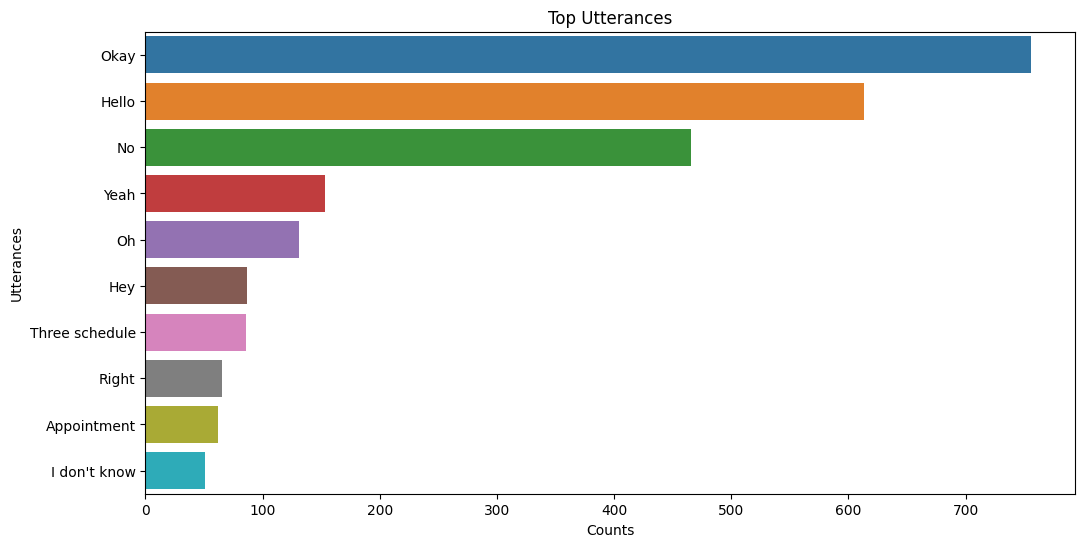

In [27]:
# Count the occurrences of each utterance
utterance_counts = df['UTTERANCES'].value_counts().head(10)  # Top 10 utterances

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=utterance_counts.values, y=utterance_counts.index)
plt.title('Top Utterances')
plt.xlabel('Counts')
plt.ylabel('Utterances')
plt.show()


####N gram Visualization

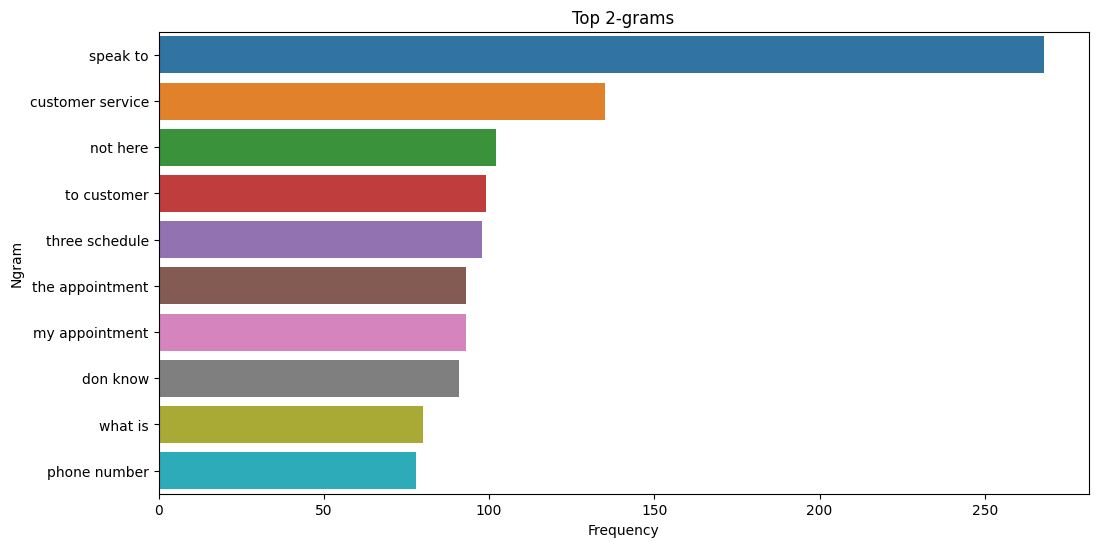

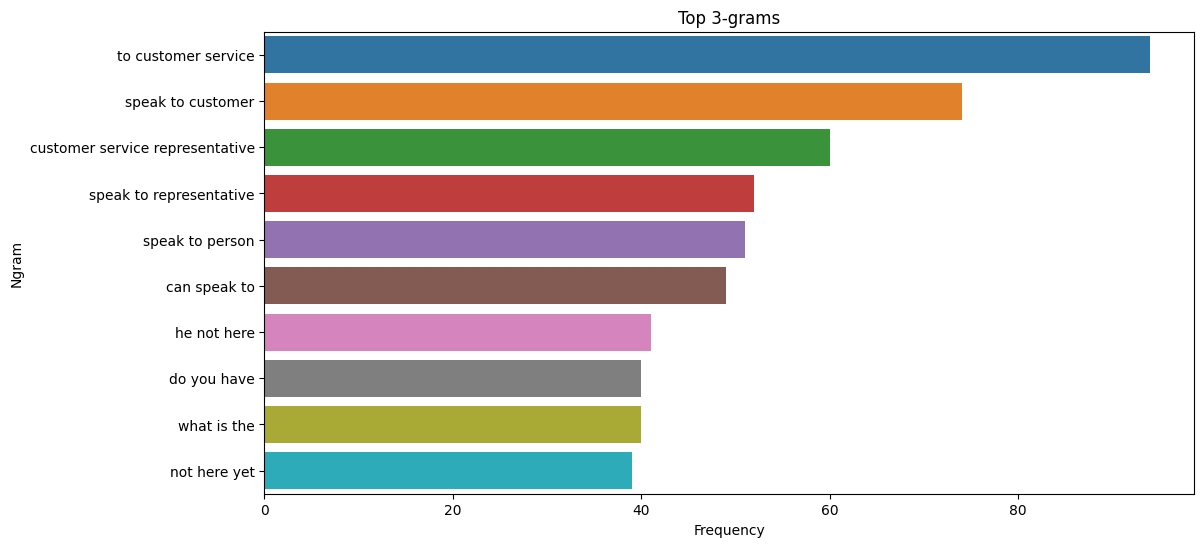

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to plot N-grams
def plot_ngrams(n):
    vectorizer = CountVectorizer(ngram_range=(n, n)).fit(df['UTTERANCES'])
    bag_of_words = vectorizer.transform(df['UTTERANCES'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_words = words_freq[:10]
    top_df = pd.DataFrame(top_words, columns=['Ngram', 'Frequency'])

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y='Ngram', data=top_df)
    plt.title(f'Top {n}-grams')
    plt.show()

# Plot bi-grams and tri-grams
plot_ngrams(2)
plot_ngrams(3)


####Top 25 & 50 UU

In [37]:
# Filter out specific words or phrases
excluded_words = {"call", "well", "please", "so", "thank you", "ok"}
filtered_utterances = df[~df['UTTERANCES'].isin(excluded_words)]
top_20_excluded = filtered_utterances['UTTERANCES'].value_counts().head(20)

# Function to filter utterances by word count
def top_n_word_utterances(n, top_n=20):
    if n >= 10:
        filtered = df[df['UTTERANCES'].str.split().str.len() >= n]
    else:
        filtered = df[df['UTTERANCES'].str.split().str.len() == n]
    return filtered['UTTERANCES'].value_counts().head(top_n)

# Prepare data for each word count category
top_2_words = top_n_word_utterances(2)
top_3_words = top_n_word_utterances(3)
top_4_words = top_n_word_utterances(4)
top_5_words = top_n_word_utterances(5)
top_6_words = top_n_word_utterances(6)
top_7_words = top_n_word_utterances(7)
top_8_words = top_n_word_utterances(8)
top_9_words = top_n_word_utterances(9)
top_10_plus_words = top_n_word_utterances(10)


In [36]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the variables for the visualizations
top_50_utterances = df['UTTERANCES'].value_counts().head(50)
top_25_utterances = df['UTTERANCES'].value_counts().head(25)

# Create subplots
fig = make_subplots()

# Add horizontal traces for top 50 and top 25 most frequent utterances
fig.add_trace(go.Bar(x=top_50_utterances.values, y=top_50_utterances.index, orientation='h', name='Top 50 Most Frequent Utterances'))
fig.add_trace(go.Bar(x=top_25_utterances.values, y=top_25_utterances.index, orientation='h', name='Top 25 Most Frequent Utterances'))

# Update layout for dropdown and adjust plot height
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label='Top 50 Most Frequent Utterances',
                     method='update',
                     args=[{'visible': [True, False]},
                           {'title': 'Top 50 Most Frequent Utterances'}]),
                dict(label='Top 25 Most Frequent Utterances',
                     method='update',
                     args=[{'visible': [False, True]},
                           {'title': 'Top 25 Most Frequent Utterances'}]),
            ]),
        )
    ],
    height=1200  # Adjust the height to accommodate the number of bars
)

# Update the layout and show the figure
fig.update_layout(title_text="Utterance Frequency Analysis", barmode='group')
fig.show()


####Top UU by word length

In [38]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# Exclude specific words or phrases from the analysis
excluded_words = {"call", "well", "please", "so", "thank you", "ok"}
filtered_utterances = df[~df['UTTERANCES'].str.split().apply(lambda x: any(word in excluded_words for word in x))]

# Function to filter utterances by word count
def top_n_word_utterances(n, top_n=20):
    if n >= 10:
        filtered = filtered_utterances[filtered_utterances['UTTERANCES'].str.split().str.len() >= n]
    else:
        filtered = filtered_utterances[filtered_utterances['UTTERANCES'].str.split().str.len() == n]
    return filtered['UTTERANCES'].value_counts().head(top_n)

# Prepare data for each word count category
top_3_words = top_n_word_utterances(3)
top_4_words = top_n_word_utterances(4)
top_5_words = top_n_word_utterances(5)
top_6_words = top_n_word_utterances(6)
top_7_words = top_n_word_utterances(7)
top_8_words = top_n_word_utterances(8)
top_9_words = top_n_word_utterances(9)
top_10_plus_words = top_n_word_utterances(10)

# Create subplots
fig = make_subplots()

# Add horizontal traces for each word count category
fig.add_trace(go.Bar(x=top_3_words.values, y=top_3_words.index, orientation='h', name='Top 20 3-Word Utterances'))
fig.add_trace(go.Bar(x=top_4_words.values, y=top_4_words.index, orientation='h', name='Top 20 4-Word Utterances'))
fig.add_trace(go.Bar(x=top_5_words.values, y=top_5_words.index, orientation='h', name='Top 20 5-Word Utterances'))
fig.add_trace(go.Bar(x=top_6_words.values, y=top_6_words.index, orientation='h', name='Top 20 6-Word Utterances'))
fig.add_trace(go.Bar(x=top_7_words.values, y=top_7_words.index, orientation='h', name='Top 20 7-Word Utterances'))
fig.add_trace(go.Bar(x=top_8_words.values, y=top_8_words.index, orientation='h', name='Top 20 8-Word Utterances'))
fig.add_trace(go.Bar(x=top_9_words.values, y=top_9_words.index, orientation='h', name='Top 20 9-Word Utterances'))
fig.add_trace(go.Bar(x=top_10_plus_words.values, y=top_10_plus_words.index, orientation='h', name='Top 20 10+ Word Utterances'))

# Define dropdown buttons for interactive plot
buttons = [
    dict(label=f'Top 20 {i}-Word Utterances',
         method='update',
         args=[{'visible': [i - 3 == j for j in range(8)]},
               {'title': f'Top 20 {i}-Word Utterances'}])
    for i in range(3, 11)
]

# Update layout for dropdown
fig.update_layout(
    updatemenus=[dict(buttons=buttons, direction="down", pad={"r": 10, "t": 10}, showactive=True, x=0.1, xanchor="left", y=1.15, yanchor="top")]
)

# Update the layout and show the figure
fig.update_layout(title_text="Utterance Analysis", barmode='group')
fig.show()


##Time Series Distribution

####Number of UU over time

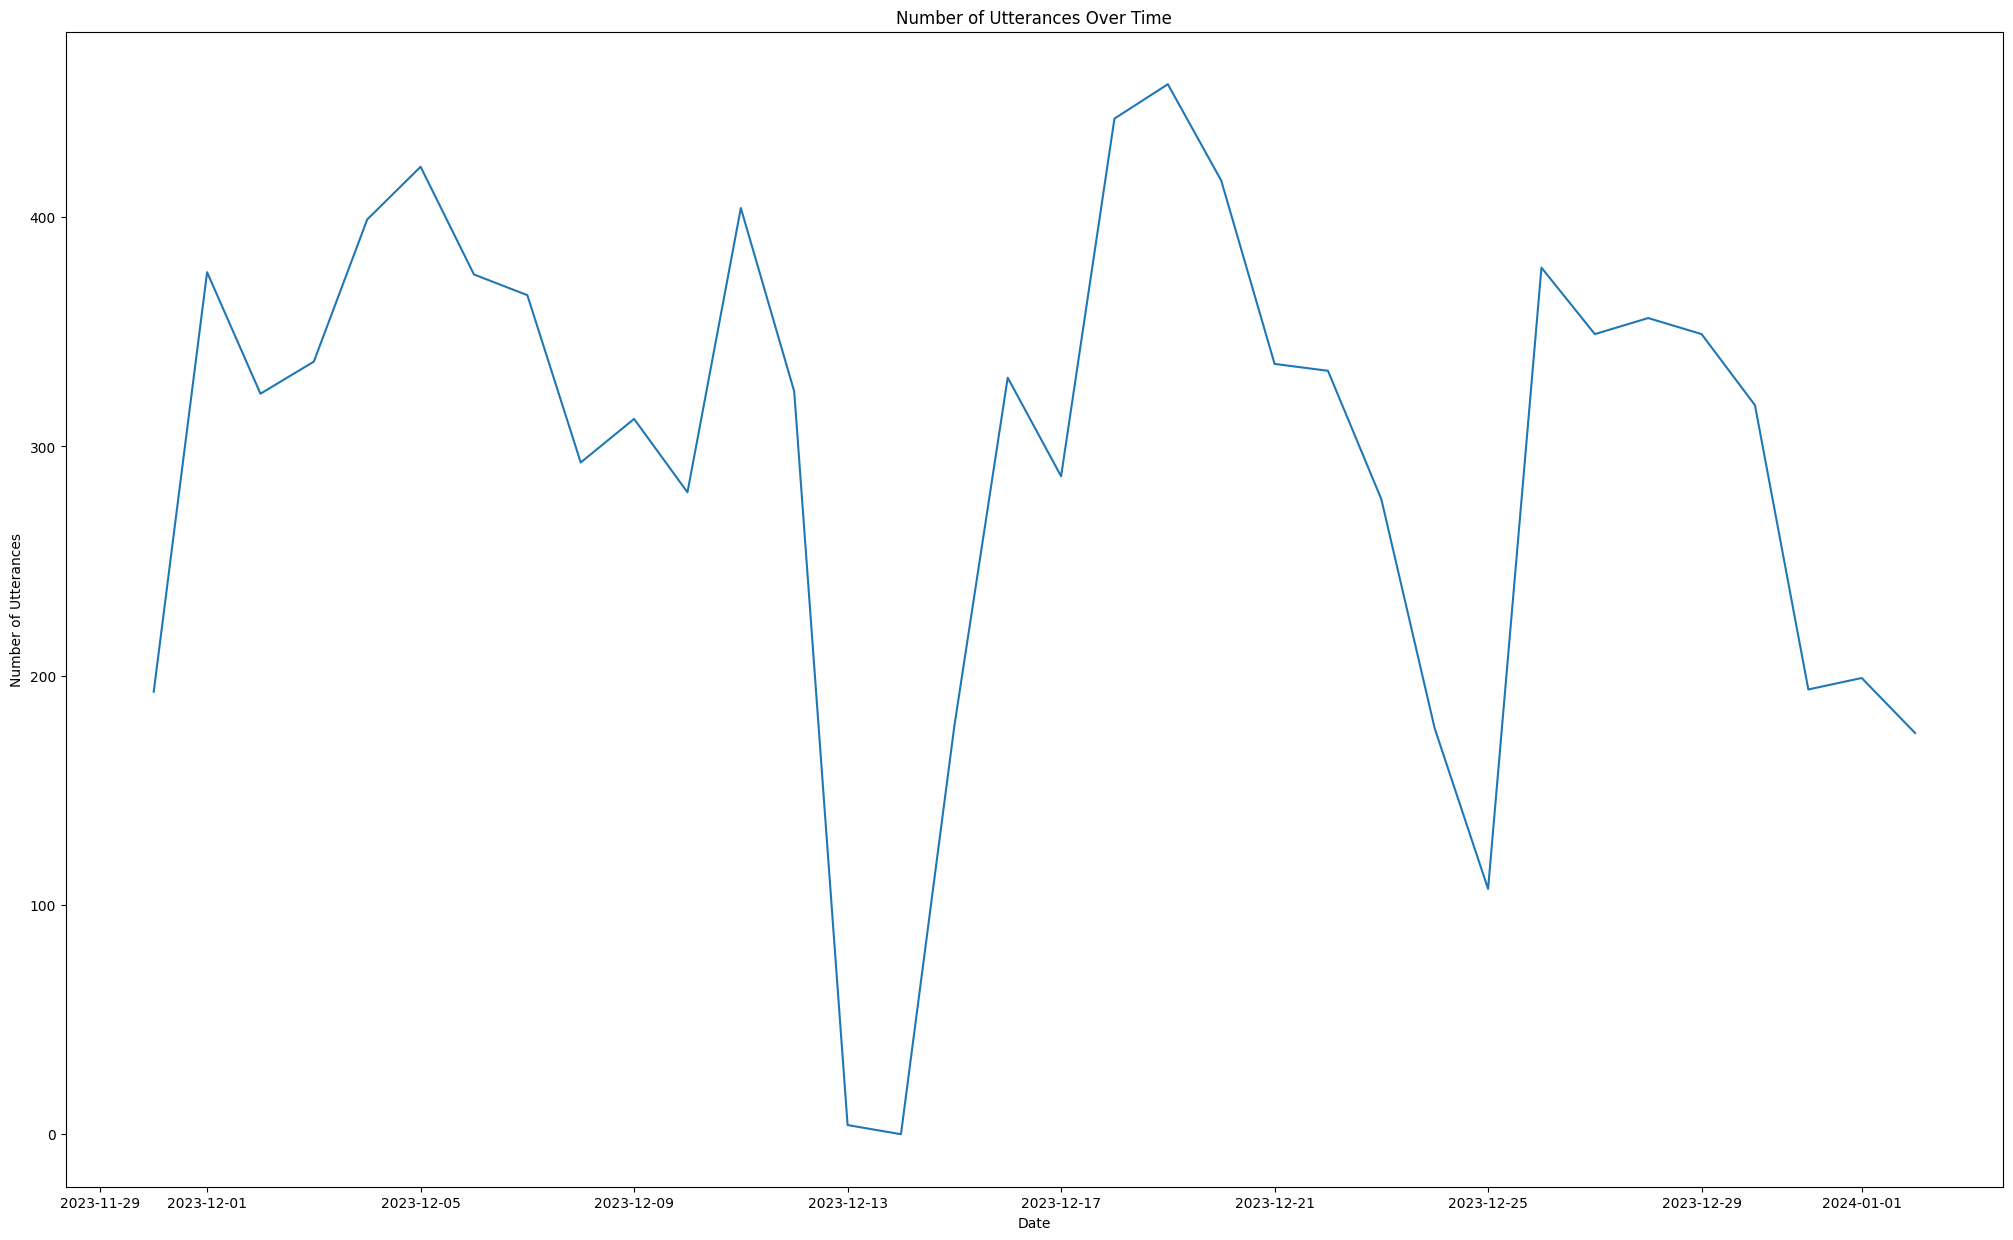

In [22]:
# Convert 'DATE & TIME' to datetime
# The format '%m-%d-%Y (%I:%M %p)' corresponds to '11-14-2023 (4:02 PM)'
df['DATE & TIME'] = pd.to_datetime(df['DATE & TIME'], format='%m-%d-%Y (%I:%M %p)')


# Resample to get counts per day (or another time period)
utterances_daily = df.resample('D', on='DATE & TIME').count()

# Plot
plt.figure(figsize=(25, 15))
plt.plot(utterances_daily['UTTERANCES'])
plt.title('Number of Utterances Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Utterances')
plt.show()


####Frequency of daily task over time

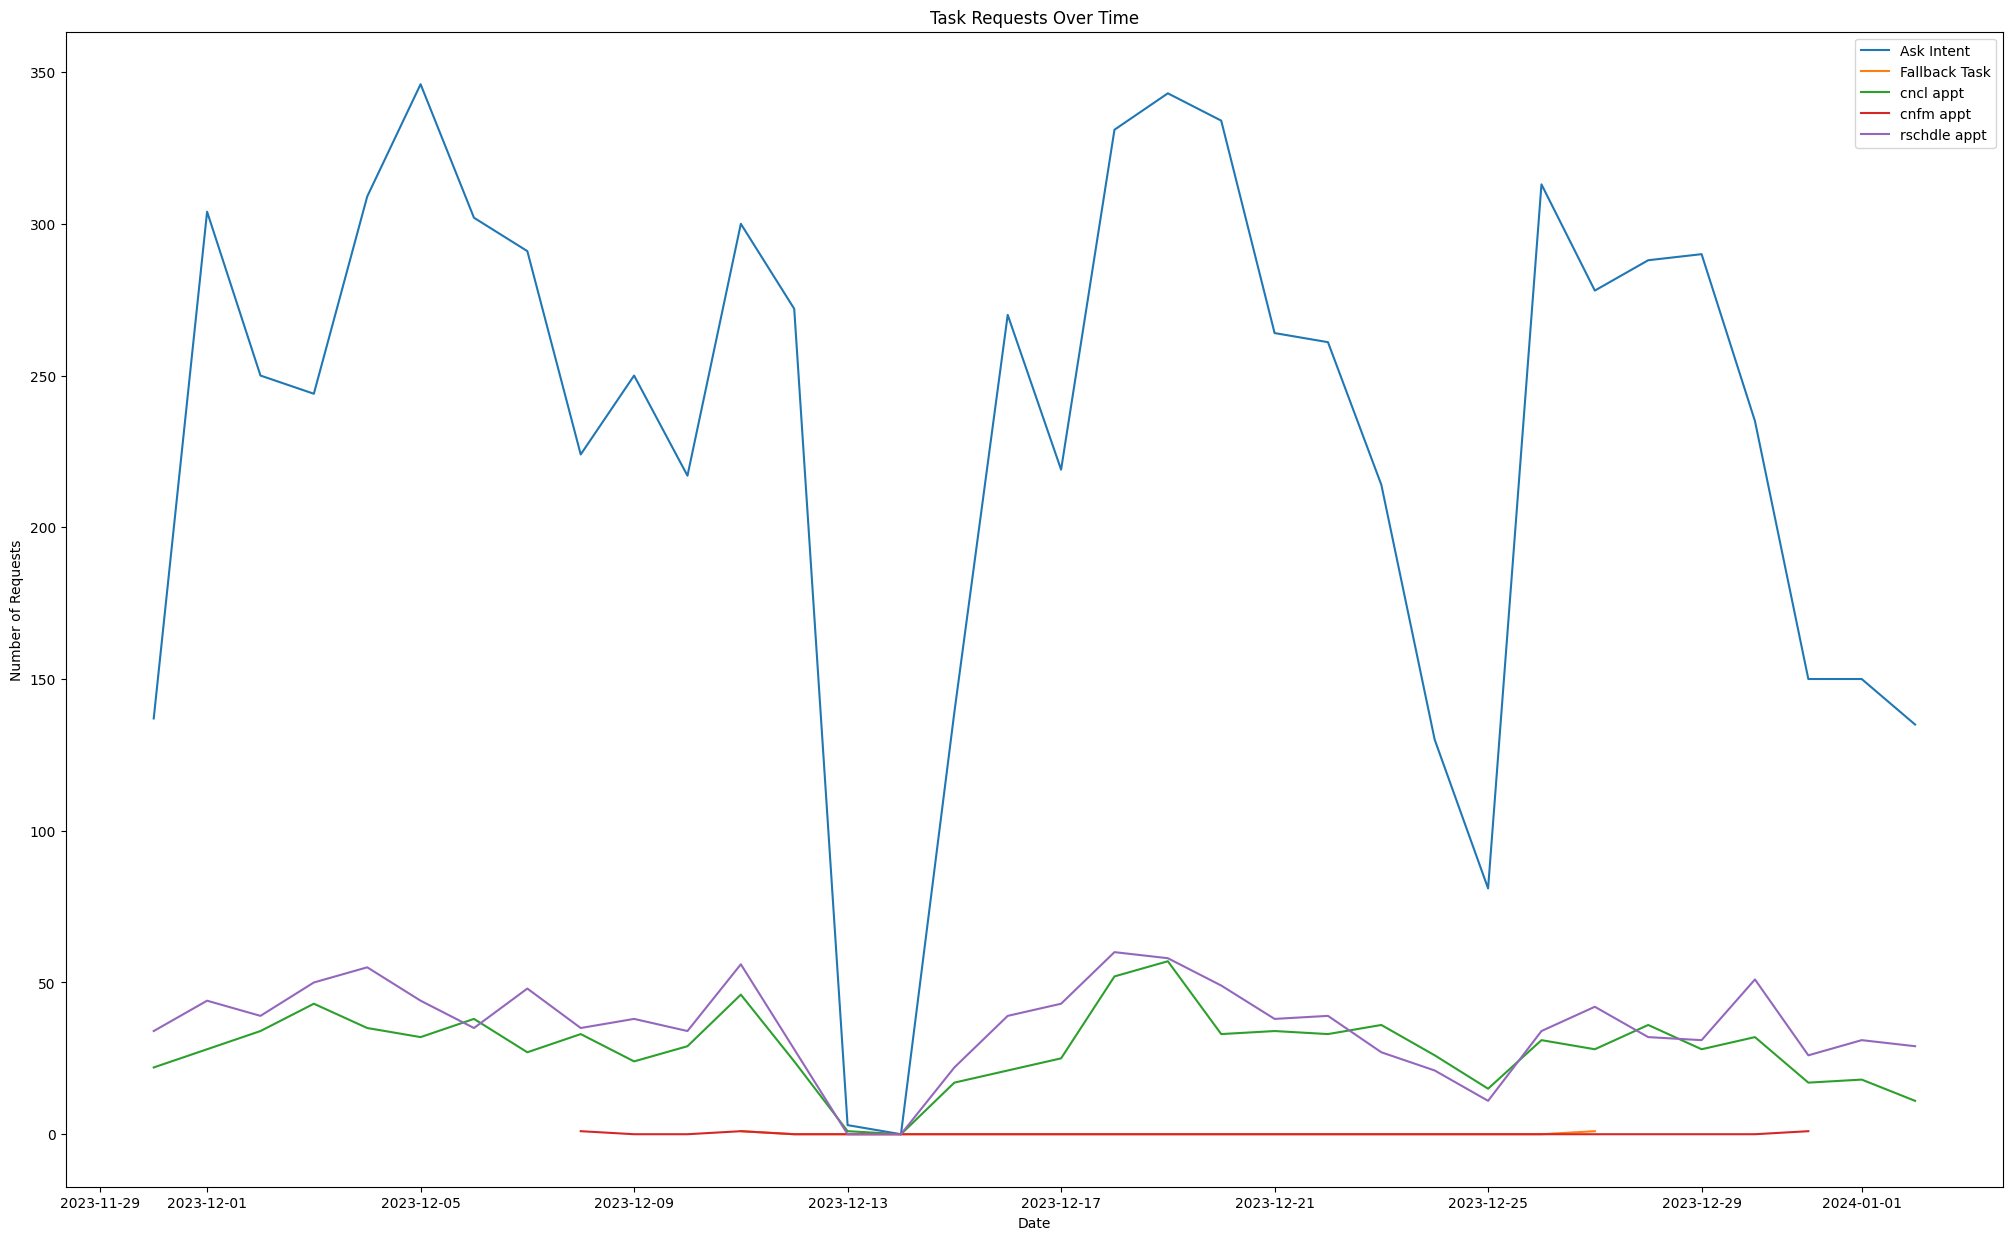

In [23]:
# Group by 'TASK NAME' and resample
task_requests_daily = df.groupby('TASK NAME').resample('D', on='DATE & TIME').count()

# Plot
plt.figure(figsize=(25, 15))
for task in task_requests_daily['UTTERANCES'].unstack(level=0).columns:
    plt.plot(task_requests_daily['UTTERANCES'].unstack(level=0)[task], label=task)
plt.title('Task Requests Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.show()


##UU Search Tool

search UU by name to see frequency of occurrence, its percentage out of total UU, and semantically simliar UU to identify probelm areas

features
- keyword search
- stattisics based on input
- semantic matching

In [35]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime

# Load your DataFrame
df_filtered = pd.read_csv('/content/Nov30-Jan2UU.csv')

# Specify the format of your 'DATE & TIME' column and convert it to datetime
datetime_format = '%m-%d-%Y (%I:%M %p)'  # Adjust the format as per your data
df_filtered['DATE & TIME'] = pd.to_datetime(df_filtered['DATE & TIME'], format=datetime_format)
df_filtered['Month'] = df_filtered['DATE & TIME'].dt.month
df_filtered['Week'] = df_filtered['DATE & TIME'].dt.isocalendar().week
df_filtered['Day'] = df_filtered['DATE & TIME'].dt.day

# Search functionality
search_input = widgets.Text(description='Search Utterances:', placeholder='Enter utterances separated by commas')
month_dropdown = widgets.Dropdown(options=['All'] + sorted(df_filtered['Month'].unique()), description='Month:')
week_dropdown = widgets.Dropdown(options=['All'] + sorted(df_filtered['Week'].unique()), description='Week:')
day_dropdown = widgets.Dropdown(options=['All'] + sorted(df_filtered['Day'].unique()), description='Day:')
search_output = widgets.Output()

def search_utterances():
    with search_output:
        search_output.clear_output()
        search_texts = [text.strip().lower() for text in search_input.value.split(',')]
        selected_month = month_dropdown.value
        selected_week = week_dropdown.value
        selected_day = day_dropdown.value

        # Filter based on time frame
        filtered_df = df_filtered.copy()
        if selected_month != 'All':
            filtered_df = filtered_df[filtered_df['Month'] == selected_month]
        if selected_week != 'All':
            filtered_df = filtered_df[filtered_df['Week'] == selected_week]
        if selected_day != 'All':
            filtered_df = filtered_df[filtered_df['Day'] == selected_day]

        total_utterances = len(filtered_df)

        for search_text in search_texts:
            # Frequency of the searched utterance
            search_frequency = filtered_df[filtered_df['UTTERANCES'].str.lower().str.contains(search_text)]['UTTERANCES'].count()

            # Percentage frequency of the searched utterance
            search_percentage = (search_frequency / total_utterances) * 100 if total_utterances > 0 else 0

            # Find similar utterances
            similar_utterances = filtered_df[filtered_df['UTTERANCES'].str.lower().str.contains(search_text)]['UTTERANCES'].unique()

            # Total frequency including similar utterances
            total_frequency = search_frequency + sum(filtered_df['UTTERANCES'].str.lower().isin(similar_utterances).astype(int)) - len(similar_utterances) # Avoid double counting

            # Total percentage frequency including similar utterances
            total_percentage_frequency = (total_frequency / total_utterances) * 100 if total_utterances > 0 else 0

            print(f"Frequency of '{search_text}': {search_frequency} ({search_percentage:.2f}% of total)")
            print(f"Total Frequency (Search + Similar) of '{search_text}': {total_frequency} ({total_percentage_frequency:.2f}% of total)")

            # Display similar utterances
            if similar_utterances.size > 0:
                print(f"\nSimilar Utterances for '{search_text}':")
                for utterance in similar_utterances:
                    print(utterance)
            else:
                print(f"\nNo similar utterances found for '{search_text}'.")
            print("\n-------------------------\n")  # Separator for multiple searches

search_button = widgets.Button(description='Search')
search_button.on_click(lambda b: search_utterances())

# Display the widgets
display(widgets.VBox([search_input, month_dropdown, week_dropdown, day_dropdown, search_button, search_output]))


#### UU Filters

In [39]:
pip install -U kaleido

In [40]:
import pickle

# Assuming 'fig' is your Plotly figure object
with open("plotly_figure.pkl", "wb") as file:
    pickle.dump(fig, file)


Day, Month, Time Filter

In [42]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime

# Specify the format of your 'DATE & TIME' column and convert it to datetime
datetime_format = '%m-%d-%Y (%I:%M %p)'  # Adjust the format as per your data
df_filtered['DATE & TIME'] = pd.to_datetime(df_filtered['DATE & TIME'], format=datetime_format)
df_filtered['Month'] = df_filtered['DATE & TIME'].dt.month
df_filtered['Week'] = df_filtered['DATE & TIME'].dt.isocalendar().week
df_filtered['Day'] = df_filtered['DATE & TIME'].dt.day

# Define a function to filter the DataFrame based on selected time elements
def filter_dataframe(selected_months, selected_weeks, selected_days):
    filtered_df = df_filtered.copy()

    if 'All' not in selected_months:
        filtered_df = filtered_df[filtered_df['Month'].isin(selected_months)]

    if 'All' not in selected_weeks:
        filtered_df = filtered_df[filtered_df['Week'].isin(selected_weeks)]

    if 'All' not in selected_days:
        filtered_df = filtered_df[filtered_df['Day'].isin(selected_days)]

    return filtered_df['UTTERANCES']

# Dropdown widgets for month, week, day
month_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Month'].unique()), description='Month:')
week_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Week'].unique()), description='Week:')
day_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Day'].unique()), description='Day:')

# Output widget for displaying the filtered utterances
output = widgets.Output()

# Function to update the output with filtered utterances
def update_output(change):
    with output:
        output.clear_output(wait=True)
        selected_months = month_dropdown.value
        selected_weeks = week_dropdown.value
        selected_days = day_dropdown.value
        filtered_utterances = filter_dataframe(selected_months, selected_weeks, selected_days)

        if not filtered_utterances.empty:
            print("Filtered Utterances:")
            for utterance in filtered_utterances:
                print(utterance)
        else:
            print("No utterances found for the selected filters.")

# Attach the update_output function to widget change events
month_dropdown.observe(update_output, names='value')
week_dropdown.observe(update_output, names='value')
day_dropdown.observe(update_output, names='value')

# Initial output
update_output(None)

# Display the widgets and output
widgets.VBox([month_dropdown, week_dropdown, day_dropdown, output])



Tracking
Phone tracking
The appointment
Followed your
Okay
Where's my checks
Okay
Ocean place
Hello
Wonderful
There's nobody here
Okay
Okay
Okay
Oh
Moved up
Okay
Technician technician technician
Tracking number
Tracking number
Give me news dollars
Yeah
Account representative
I was told I had to do a three-way R
I was told I had to do a three-way pharmacy
Q
Oh
Oh three seven
Speak to a person
No
I'm on the phone son
Testing testing service please
I don't know
Oh I was told it was scheduled for three o'clock
Hello
Hello
General appointment
May I please have technical support
No
If can I talk to a customer service agent
Spectrum is calling on my landline which is dead
On what date
Main menu
Pointment
Is he on his way
Three oh four
May I speak to a service customer service rep
Huh working you release this and this and
Hello
Internet is working
Hi
They called me and left me a message
When is my appointment
Done
Can I please speak to customer service
Okay great
Can I talk to a chick please


####Top 25 Day, Week, Month

In [44]:

# Define a function to filter the DataFrame and return top 20 utterances with at least 2 words
def get_top_utterances(selected_months, selected_weeks, selected_days):
    filtered_df = df_filtered.copy()

    if 'All' not in selected_months:
        filtered_df = filtered_df[filtered_df['Month'].isin(selected_months)]

    if 'All' not in selected_weeks:
        filtered_df = filtered_df[filtered_df['Week'].isin(selected_weeks)]

    if 'All' not in selected_days:
        filtered_df = filtered_df[filtered_df['Day'].isin(selected_days)]

    # Filter utterances with at least 2 words
    filtered_df = filtered_df[filtered_df['UTTERANCES'].str.split().str.len() >= 2]

    # Count the occurrences of each utterance
    top_utterances = filtered_df['UTTERANCES'].value_counts().head(20)

    return top_utterances

# Dropdown widgets for month, week, day
month_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Month'].unique()), description='Month:')
week_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Week'].unique()), description='Week:')
day_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Day'].unique()), description='Day:')

# Output widget for displaying the top utterances
output = widgets.Output()

# Function to update the output with top utterances
def update_output(change):
    with output:
        output.clear_output(wait=True)
        selected_months = month_dropdown.value
        selected_weeks = week_dropdown.value
        selected_days = day_dropdown.value
        top_utterances = get_top_utterances(selected_months, selected_weeks, selected_days)

        if not top_utterances.empty:
            print("Top 20 Utterances with at least 2 words:")
            print(top_utterances)
        else:
            print("No utterances found for the selected filters.")

# Attach the update_output function to widget change events
month_dropdown.observe(update_output, names='value')
week_dropdown.observe(update_output, names='value')
day_dropdown.observe(update_output, names='value')

# Initial output
update_output(None)

# Display the widgets and output
widgets.VBox([month_dropdown, week_dropdown, day_dropdown, output])


In [45]:
import plotly.express as px

# Function to create a bar plot for top utterances
def create_bar_plot(df, x_column, title):
    fig = px.bar(df, x=x_column, y='Counts', color='UTTERANCES', title=title)
    fig.show()

# Create and show plots
create_bar_plot(top_utterances_day, 'Day', 'Top Utterances by Day')
create_bar_plot(top_utterances_month, 'Month', 'Top Utterances by Month')
create_bar_plot(top_utterances_week, 'Week', 'Top Utterances by Week')


NameError: name 'top_utterances_day' is not defined

In [46]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return polarity and subjectivity
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to each utterance
df['Sentiment_Polarity'], df['Sentiment_Subjectivity'] = zip(*df['UTTERANCES'].apply(calculate_sentiment))


In [47]:
import pandas as pd
import plotly.graph_objects as go

# Sample DataFrame (Replace with your actual DataFrame)
# df = ...

# Create a scatter plot for sentiment polarity and subjectivity
scatter_fig = go.Figure()

# Add scatter points for positive sentiment
positive_sentiment = df[df['Sentiment_Polarity'] > 0]
scatter_fig.add_trace(go.Scatter(
    x=positive_sentiment['Sentiment_Polarity'],
    y=positive_sentiment['Sentiment_Subjectivity'],
    mode='markers',
    name='Positive Sentiment',
    marker=dict(color='green', size=8),
    text=positive_sentiment['UTTERANCES'],
))

# Add scatter points for neutral sentiment
neutral_sentiment = df[df['Sentiment_Polarity'] == 0]
scatter_fig.add_trace(go.Scatter(
    x=neutral_sentiment['Sentiment_Polarity'],
    y=neutral_sentiment['Sentiment_Subjectivity'],
    mode='markers',
    name='Neutral Sentiment',
    marker=dict(color='grey', size=8),
    text=neutral_sentiment['UTTERANCES'],
))

# Add scatter points for negative sentiment
negative_sentiment = df[df['Sentiment_Polarity'] < 0]
scatter_fig.add_trace(go.Scatter(
    x=negative_sentiment['Sentiment_Polarity'],
    y=negative_sentiment['Sentiment_Subjectivity'],
    mode='markers',
    name='Negative Sentiment',
    marker=dict(color='red', size=8),
    text=negative_sentiment['UTTERANCES'],
))

# Customize the layout of the scatter plot
scatter_fig.update_layout(
    title='Sentiment Analysis',
    xaxis_title='Polarity',
    yaxis_title='Subjectivity',
    showlegend=True,
)

# Define regions for shading
positive_region = {
    'type': 'rect',
    'x0': 0,
    'x1': 1,
    'y0': 0,
    'y1': 1,
    'fillcolor': 'green',
    'opacity': 0.2,
    'line': {'width': 0},
}

neutral_region = {
    'type': 'rect',
    'x0': -1,
    'x1': 1,
    'y0': -1,
    'y1': 1,
    'fillcolor': 'grey',
    'opacity': 0.2,
    'line': {'width': 0},
}

negative_region = {
    'type': 'rect',
    'x0': -1,
    'x1': 0,
    'y0': 0,
    'y1': 1,
    'fillcolor': 'red',
    'opacity': 0.2,
    'line': {'width': 0},
}

# Add shaded regions to the plot
scatter_fig.update_layout(shapes=[positive_region, neutral_region, negative_region])

# Show the plot
scatter_fig.show()


In [48]:
import pandas as pd
import plotly.graph_objects as go

# Sample DataFrame (Replace with your actual DataFrame)
# df = ...

# Calculate sentiment categories: Positive, Neutral, Negative
df['Sentiment_Category'] = df['Sentiment_Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Create a bar chart for sentiment categories
sentiment_counts = df['Sentiment_Category'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

fig = go.Figure(data=[go.Bar(
    x=sentiment_counts['Sentiment'],
    y=sentiment_counts['Count'],
    text=sentiment_counts['Count'],
    textposition='auto',
    marker_color=['green', 'grey', 'red'],  # Colors for Positive, Neutral, Negative
)])

fig.update_layout(
    title='Sentiment Analysis',
    xaxis_title='Sentiment Category',
    yaxis_title='Frequency',
)

# Calculate statistics
average_polarity = df['Sentiment_Polarity'].mean()
most_frequent_sentiment = sentiment_counts.iloc[0]['Sentiment']
most_frequent_count = sentiment_counts.iloc[0]['Count']

# Add statistics to the chart title
fig.update_layout(
    title=f'Sentiment Analysis (Avg Polarity: {average_polarity:.2f}, Most Frequent: {most_frequent_sentiment} - {most_frequent_count} times)'
)

# Show the chart
fig.show()


Model Building

In [49]:
!pip install git+https://github.com/huggingface/accelerate.git


  Cloning https://github.com/huggingface/accelerate.git to /tmp/pip-req-build-g2udg0x8
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate.git /tmp/pip-req-build-g2udg0x8
  Resolved https://github.com/huggingface/accelerate.git to commit f823404f69f6bc27aeb94ef43278f1274fd5163d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [50]:
pip install transformers[torch] accelerate==0.20.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 2.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of transformers[torch] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 5.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of transformers[torch] to determine which version is compatible with other requirements. This co

In [51]:
!pip install transformers


In [ ]:
!pip install accelerate


In [52]:
pip install torch transformers scikit-learn pandas

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
import torch



In [55]:
# Sample predicted label IDs (replace with actual predictions)
predicted_labels = [0, 1, 2, 0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16 ,17, 18, 19, 20, 21, 22, 23]

# Define a label-to-intent mapping dictionary
label_to_intent = {
    0: 'rschdle appt',
    1: 'AgentTransfer',
    2: 'cnfm appt',
    3: 'cncl appt',
    4: 'Technical Support',
    5: 'Transfer',
    6: 'Fallback Task',
    7: 'Can I manage my appointments online?',
    8: 'Repeat',
    9: 'Billing',
    10: 'I have a missed call from spectrum',
    11: 'Appt Unsupported Intents',
    12: 'Mobile',
    13: 'Do you call me before you start?',
    14: 'SmallTalk - CustomSmallTalk',
    15: 'is there a fee',
    16: 'Sales',
    17: 'How old does the person need to be to meet with the technician?',
    18: 'Activation',
    19: 'How long does it take to complete the work?',
    20: 'Do you require someone to be on-site for the repair work?',
    21: "Small Talk",
}

def decode_intents(predicted_labels, label_to_intent):
    decoded_intents = []
    for label in predicted_labels:
        if label in label_to_intent:
            decoded_intents.append(label_to_intent[label])
        else:
            decoded_intents.append('Unknown')  # or handle it in some other way
    return decoded_intents

decoded_intents = decode_intents(predicted_labels, label_to_intent)
print(decoded_intents)


# Decode predicted intents
decoded_intents = decode_intents(predicted_labels, label_to_intent)

# Print the decoded intents
print(decoded_intents)


['rschdle appt', 'AgentTransfer', 'cnfm appt', 'rschdle appt', 'cncl appt', 'Technical Support', 'Transfer', 'Fallback Task', 'Can I manage my appointments online?', 'Repeat', 'Billing', 'I have a missed call from spectrum', 'Appt Unsupported Intents', 'Mobile', 'Do you call me before you start?', 'SmallTalk - CustomSmallTalk', 'is there a fee', 'Sales', 'How old does the person need to be to meet with the technician?', 'Activation', 'How long does it take to complete the work?', 'Do you require someone to be on-site for the repair work?', 'Small Talk', 'Unknown', 'Unknown']
['rschdle appt', 'AgentTransfer', 'cnfm appt', 'rschdle appt', 'cncl appt', 'Technical Support', 'Transfer', 'Fallback Task', 'Can I manage my appointments online?', 'Repeat', 'Billing', 'I have a missed call from spectrum', 'Appt Unsupported Intents', 'Mobile', 'Do you call me before you start?', 'SmallTalk - CustomSmallTalk', 'is there a fee', 'Sales', 'How old does the person need to be to meet with the technici

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155867 entries, 0 to 155866
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   UTTERANCES   155867 non-null  object 
 1   INTENT       155867 non-null  object 
 2   USERID       155867 non-null  object 
 3   CHANNELUID   155867 non-null  object 
 4   LANGUAGE     155867 non-null  object 
 5   DATE & TIME  155867 non-null  object 
 6   CHANNEL      155867 non-null  object 
 7   TRAINED      155867 non-null  bool   
 8   MESSAGEID    155867 non-null  object 
 9   USERTAGS     129579 non-null  object 
 10  SESSIONTAGS  155850 non-null  object 
 11  MESSAGETAGS  0 non-null       float64
 12  TRAITS       2785 non-null    object 
dtypes: bool(1), float64(1), object(11)
memory usage: 14.4+ MB


In [65]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
import torch

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/Nov1-Jan2PSI - in.csv')

# Define the intent labels
intent_labels = [
     'rschdle appt',
     'AgentTransfer',
     'cnfm appt',
     'cncl appt',
     'Technical Support',
     'Transfer',
     'Fallback Task',
     'Can I manage my appointments online?',
     'Repeat',
     'Billing',
     'I have a missed call from spectrum',
     'Appt Unsupported Intents',
     'Mobile',
     'Do you call me before you start?',
     'SmallTalk - CustomSmallTalk',
     'is there a fee',
     'Sales',
     'How old does the person need to be to meet with the technician?',
     'Activation',
     'How long does it take to complete the work?',
     'Do you require someone to be on-site for the repair work?',
     "SmallTalk - greetings",
     "Wait Dialog",
     "Does somebody need to be home during that time?"
]

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the utterances
encodings = tokenizer(list(df['UTTERANCES']), truncation=True, padding=True, return_tensors='pt', max_length=128)

# Extract labels from your DataFrame
labels = df['INTENT']

# Convert labels to numeric values
label_mapping = {label: idx for idx, label in enumerate(intent_labels)}
numeric_labels = [label_mapping[label] for label in labels]

# Create PyTorch datasets
dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(numeric_labels))

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create data loaders
batch_size = 32
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

# Load the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(intent_labels))

# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * 3)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Fine-tuning loop
num_epochs = 6
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss}")

from torch.nn.functional import softmax

# Function to apply new mapping rules
def apply_new_rules(predictions, confidences, utterances):
    new_predictions = []
    for pred, conf, utterance in zip(predictions, confidences, utterances):
        if conf < 50:
            new_predictions.append('Fallback Task')
        elif utterance.strip().lower() in ["hello", "no", "thank you", "yes"]:
            new_predictions.append('Small Talk')
        else:
            new_predictions.append(intent_labels[pred])
    return new_predictions

# Example prediction loop (modify as per your prediction setup)
model.eval()
predictions, confidences, utterances = [], [], []
for batch in val_dataloader:
    batch = tuple(t.to(device) for t in batch)
    inputs = {'input_ids': batch[0], 'attention_mask': batch[1]}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = softmax(logits, dim=1)
        top_probs, top_lbls = probs.max(dim=1)

        predictions.extend(top_lbls.cpu().numpy())
        confidences.extend((top_probs * 100).cpu().numpy())
        utterances.extend(batch[2])  # Adjust this line as per your setup to get utterances

# Apply the new mapping rules
modified_predictions = apply_new_rules(predictions, confidences, utterances)

# Save the fine-tuned model
model.save_pretrained("./saved_model_directory")


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Epoch 1/6, Average Training Loss: 0.30164884228459116
Epoch 2/6, Average Training Loss: 0.18532336470956584


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 76>:90                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/_tensor.py:492 in backward                         │
│                                                                                                  │
│    489 │   │   │   │   create_graph=create_graph,                                                │
│    490 │   │   │   │   inputs=inputs,                                                            │
│    491 │   │   │   )                                                                             │
│ ❱  492 │   │   torch.autograd.backward(                                                          │
│    493 │   │   │   self, gradient, retain_graph, create_graph, inputs=inputs                     │
│    494 │   │   )                                                                                 │
│    495                                                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/autograd/__init__.py:251 in backward               │
│                                                                                                  │
│   248 │   # The reason we repeat the same comment below is that                                  │
│   249 │   # some Python versions print out the first line of a multi-line function               │
│   250 │   # calls in the traceback and some print out the last line                              │
│ ❱ 251 │   Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the bac   │
│   252 │   │   tensors,                                                                           │
│   253 │   │   grad_tensors_,                                                                     │
│   254 │   │   retain_graph,                                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Epoch 1/6, Average Training Loss: 0.3020542187375811
Epoch 2/6, Average Training Loss: 0.18361760433791943
Epoch 3/6, Average Training Loss: 0.15295152861647898
Epoch 4/6, Average Training Loss: 0.140104547798039
Epoch 5/6, Average Training Loss: 0.1398700448011175
Epoch 6/6, Average Training Loss: 0.13974351079346817


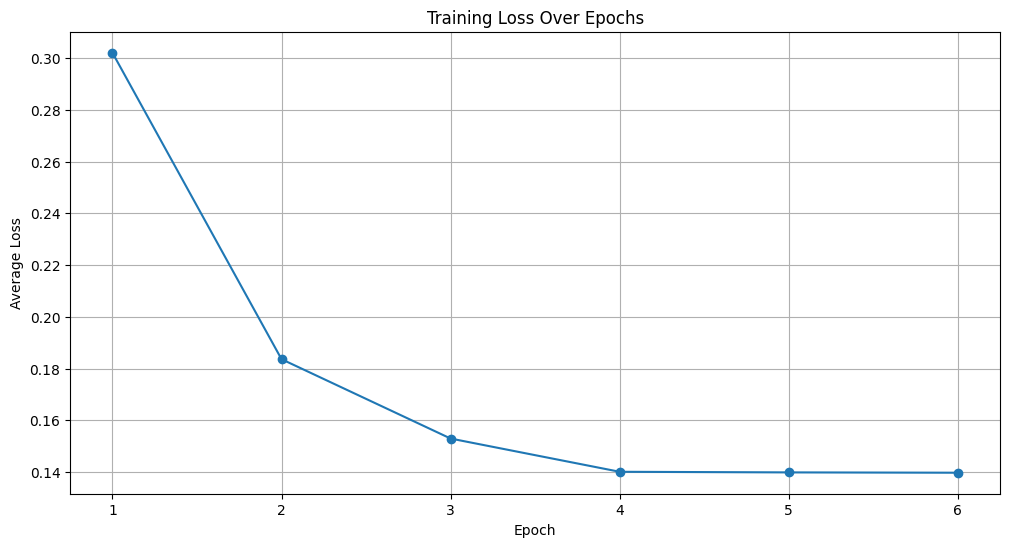

In [69]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Nov1-Jan2PSI - in.csv')

# Define the intent labels
intent_labels = [
     'rschdle appt',
     'AgentTransfer',
     'cnfm appt',
     'cncl appt',
     'Technical Support',
     'Transfer',
     'Fallback Task',
     'Can I manage my appointments online?',
     'Repeat',
     'Billing',
     'I have a missed call from spectrum',
     'Appt Unsupported Intents',
     'Mobile',
     'Do you call me before you start?',
     'SmallTalk - CustomSmallTalk',
     'is there a fee',
     'Sales',
     'How old does the person need to be to meet with the technician?',
     'Activation',
     'How long does it take to complete the work?',
     'Do you require someone to be on-site for the repair work?',
     "SmallTalk - greetings",
     "Wait Dialog",
     "Does somebody need to be home during that time?"
]

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the utterances
encodings = tokenizer(list(df['UTTERANCES']), truncation=True, padding=True, return_tensors='pt', max_length=128)

# Extract labels from your DataFrame
labels = df['INTENT']

# Convert labels to numeric values
label_mapping = {label: idx for idx, label in enumerate(intent_labels)}
numeric_labels = [label_mapping[label] for label in labels]

# Create PyTorch datasets
dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(numeric_labels))

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create data loaders
batch_size = 32
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

# Load the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(intent_labels))

# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * 3)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Fine-tuning loop with loss tracking
epoch_loss_values = []
num_epochs = 6
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}

        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    epoch_loss_values.append(avg_train_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss}")

# Save the fine-tuned model
model.save_pretrained("./saved_model_directory")

# Plot the training loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs + 1), epoch_loss_values, marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.grid(True)
plt.show()


In [70]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load the fine-tuned model
model = BertForSequenceClassification.from_pretrained("/content/saved_model_directory")

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Load the new CSV file with utterances
new_csv_file_path = "/content/Nov30-Jan2UU.csv"  # Replace with the actual path to your new file
df_new = pd.read_csv(new_csv_file_path)

# Tokenize the utterances
encodings = tokenizer(list(df_new['UTTERANCES']), truncation=True, padding=True, return_tensors="pt", max_length=128)

# Make predictions
with torch.no_grad():
    logits = model(**encodings).logits

# Decode the predicted labels
predicted_labels = logits.argmax(dim=1).tolist()
decoded_labels = [intent_labels[label] for label in predicted_labels]

# Add the predicted labels and decoded labels to the DataFrame
df_new['Predicted_Labels'] = predicted_labels
df_new['Decoded_Labels'] = decoded_labels

# Save the DataFrame with predictions and decoded labels to a new CSV file
output_csv_file_path = "/content/results.csv"  # Specify the path for the output CSV file
df_new.to_csv(output_csv_file_path, index=False)

# Display the DataFrame with predictions and decoded labels
print(df_new)


                          UTTERANCES  TRAITS PROMPT TYPE   TASK NAME  \
0                              Today     NaN     message  Ask Intent   
1                            Correct     NaN      entity   cncl appt   
2                              Sales     NaN      entity  Ask Intent   
3                                  Q     NaN     message   cncl appt   
4                Speak with a person     NaN      entity  Ask Intent   
...                              ...     ...         ...         ...   
10063                       I was by     NaN      entity  Ask Intent   
10064               Mike TVs working     NaN      entity  Ask Intent   
10065            Verizon wireless me     NaN      entity  Ask Intent   
10066  They have changed it to today     NaN      entity  Ask Intent   
10067                       Hey John     NaN      entity  Ask Intent   

                     NODE NAME                                  USERID  \
0                 AnythingElse  u-62deb0ef-fef6-54e9-b455-c07

In [71]:
# Print only the "UTTERANCES" and "Predicted_Labels" columns
print(df_new[["UTTERANCES", "Predicted_Labels", 'Decoded_Labels']])


                          UTTERANCES  Predicted_Labels     Decoded_Labels
0                              Today                 0       rschdle appt
1                            Correct                 2          cnfm appt
2                              Sales                 5           Transfer
3                                  Q                 2          cnfm appt
4                Speak with a person                 1      AgentTransfer
...                              ...               ...                ...
10063                       I was by                22        Wait Dialog
10064               Mike TVs working                 4  Technical Support
10065            Verizon wireless me                 4  Technical Support
10066  They have changed it to today                 0       rschdle appt
10067                       Hey John                22        Wait Dialog

[10068 rows x 3 columns]
